In [93]:
import pandas as pd
from pygam import LinearGAM, s
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [78]:
train_features = pd.read_csv('/Users/jakebrulato/Documents/GitHub/DSBA6010/Interpretable_Models/test_features.csv')
train_labels = pd.read_csv('/Users/jakebrulato/Documents/GitHub/DSBA6010/Interpretable_Models/train_labels.csv')
test_features = pd.read_csv('/Users/jakebrulato/Documents/GitHub/DSBA6010/Interpretable_Models/test_features.csv')
test_labels = pd.read_csv('/Users/jakebrulato/Documents/GitHub/DSBA6010/Interpretable_Models/test_labels.csv')


/var/folders/6s/bfbnxg_x46gfcltpcwwr67200000gn/T/ipykernel_44376/1398448623.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  train_features = pd.read_csv('/Users/jakebrulato/Documents/GitHub/DSBA6010/Interpretable_Models/test_features.csv')
/var/folders/6s/bfbnxg_x46gfcltpcwwr67200000gn/T/ipykernel_44376/1398448623.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  test_features = pd.read_csv('/Users/jakebrulato/Documents/GitHub/DSBA6010/Interpretable_Models/test_features.csv')


In [79]:
drop_features = train_features.select_dtypes(['datetime', 'O']).columns.tolist()
print('Dropping: ', drop_features)
train_features.drop(columns=drop_features, inplace=True)
test_features.drop(columns=drop_features, inplace=True)

Dropping:  ['emp_title', 'emp_length', 'home_ownership', 'desc', 'purpose', 'title', 'addr_state', 'earliest_cr_line']


In [80]:
most_missing_cols = train_features.isna().mean().sort_values(ascending=False)
drop_features = most_missing_cols.index.tolist()[:4]
print('Dropping: ', drop_features)
train_features.drop(columns=drop_features, inplace=True)
test_features.drop(columns=drop_features, inplace=True)
train_target = train_labels['loan_status']
test_target = test_labels['loan_status']

Dropping:  ['mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_recent_revol_delinq', 'mths_since_last_delinq']


In [81]:
X_train = train_features
y_train = train_target
X_test = test_features
y_test = test_target

In [82]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_labeled = label_encoder.fit_transform(y_train.values.ravel())
y_test_labeled = label_encoder.transform(y_test.values.ravel())

y_train_labeled_df = pd.DataFrame(y_train_labeled, columns=['Label'])
y_test_labeled_df = pd.DataFrame(y_test_labeled, columns=['Label'])



In [83]:
def limit_rows(x_data, y_data, max_rows=10000):
    # Check if the number of rows exceeds the limit
    if len(x_data) > max_rows:
        x_data = x_data.iloc[:max_rows, :]
        y_data = y_data.iloc[:max_rows, :]
    return x_data, y_data
    

In [84]:
y_test = y_test_labeled_df
y_train = y_train_labeled_df
X_test = X_test.fillna(0)
X_train = X_train.fillna(0)
x_train_limited, y_train_limited = limit_rows(X_train, y_train, max_rows=10000)
x_test_limited, y_test_limited = limit_rows(X_test, y_test, max_rows=10000)


In [88]:
pred

array([0.88114928, 0.86321858, 0.87544182, ..., 0.86492312, 0.86300305,
       0.86333431])

In [89]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train_limited, y_train_limited)
pred = model.predict(x_test_limited)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_limited, pred)

print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 76.59%


[Text(0.8393514453715031, 0.9901960784313726, 'num_actv_bc_tl <= 18.5\ngini = 0.231\nsamples = 10000\nvalue = [1330, 8670]\nclass = y[1]'),
 Text(0.8369142089690925, 0.9705882352941176, 'mo_sin_rcnt_rev_tl_op <= 156.5\ngini = 0.23\nsamples = 9996\nvalue = [1327, 8669]\nclass = y[1]'),
 Text(0.8356955907678872, 0.9509803921568627, 'mo_sin_old_rev_tl_op <= 586.5\ngini = 0.23\nsamples = 9994\nvalue = [1325, 8669]\nclass = y[1]'),
 Text(0.7936084567578391, 0.9313725490196079, 'num_accts_ever_120_pd <= 11.5\ngini = 0.229\nsamples = 9984\nvalue = [1320, 8664]\nclass = y[1]'),
 Text(0.7130900433413586, 0.9117647058823529, 'bc_open_to_buy <= 131733.0\ngini = 0.229\nsamples = 9974\nvalue = [1315, 8659]\nclass = y[1]'),
 Text(0.5581463075144242, 0.8921568627450981, 'num_il_tl <= 36.5\ngini = 0.228\nsamples = 9960\nvalue = [1309, 8651]\nclass = y[1]'),
 Text(0.2580077814701977, 0.8725490196078431, 'tot_hi_cred_lim <= 21295.5\ngini = 0.227\nsamples = 9891\nvalue = [1292, 8599]\nclass = y[1]'),
 Te

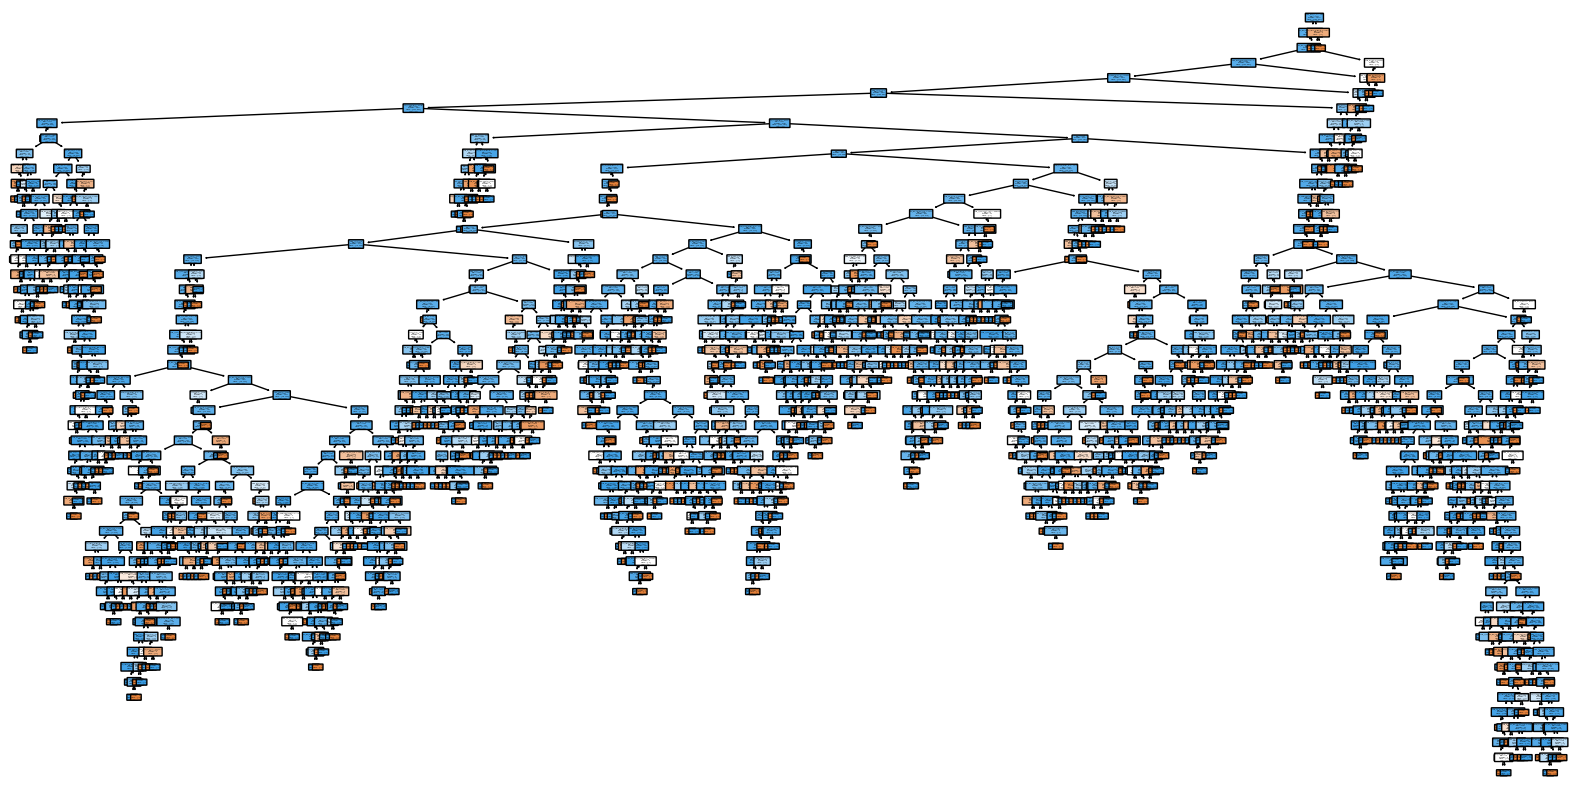

In [94]:
# Plot the decision tree
plt.figure(figsize=(20,10))  # You can adjust the size depending on your tree complexity
plot_tree(model, filled=True, feature_names=x_train_limited.columns, class_names=True, rounded=True)



Decision Tree Classifier Accuracy (Pruned): 86.07%


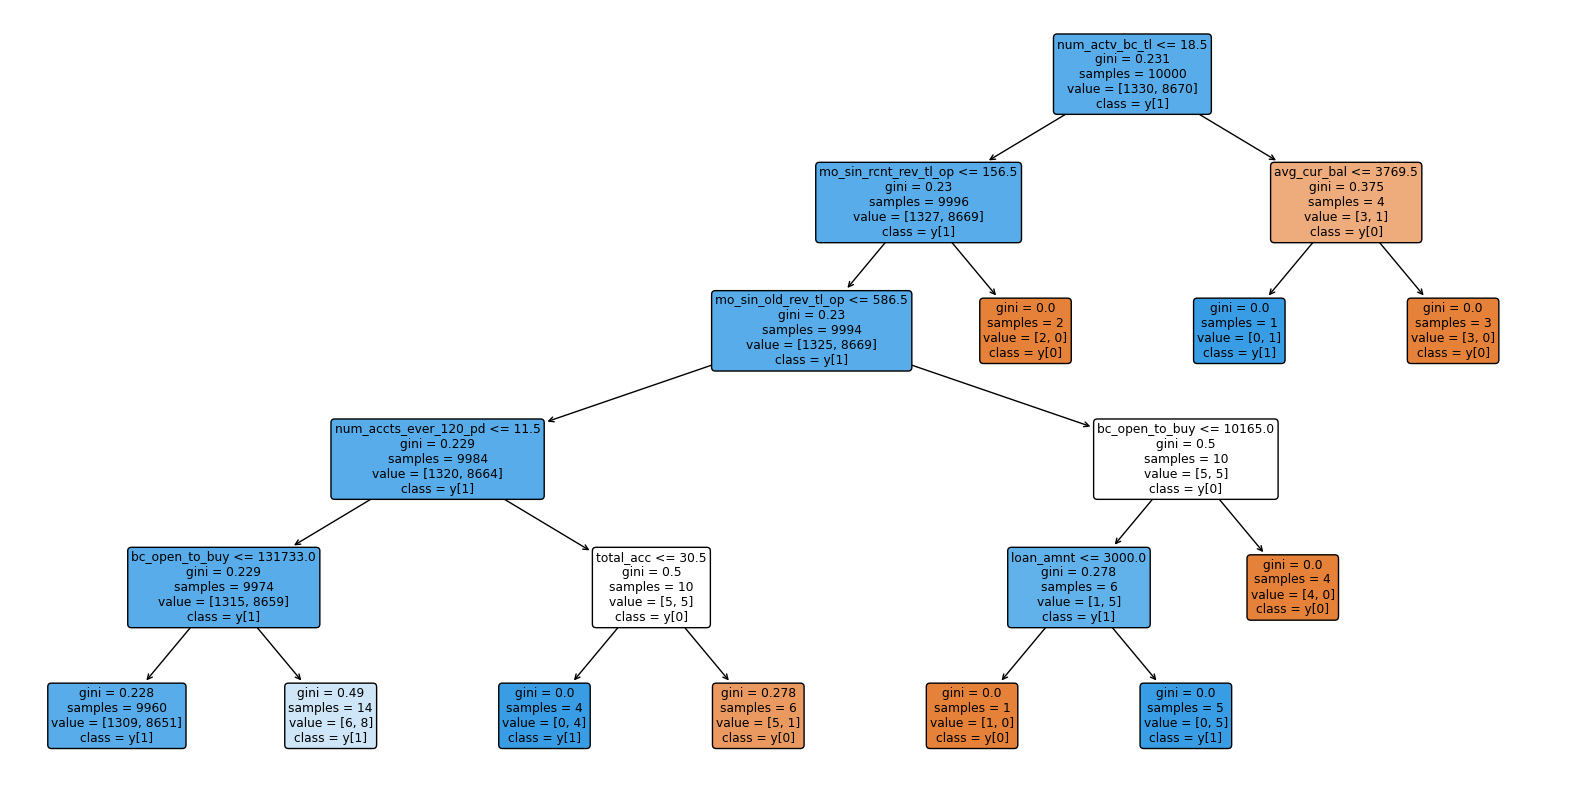

In [95]:
# For classification
clf_pruned = DecisionTreeClassifier(max_depth=5, random_state=42)

# For regression
# regr_pruned = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the pruned model on training data
clf_pruned.fit(x_train_limited, y_train_limited)

# Predicting the test set results
y_pred_pruned = clf_pruned.predict(x_test_limited)

# Calculate the accuracy for classification or MSE for regression
accuracy_pruned = accuracy_score(y_test_limited, y_pred_pruned)
print(f'Decision Tree Classifier Accuracy (Pruned): {accuracy_pruned * 100:.2f}%')

# Visualize the pruned tree
plt.figure(figsize=(20, 10))
plot_tree(clf_pruned, filled=True, feature_names=x_train_limited.columns, class_names=True, rounded=True)

# Show the plot
plt.show()